This document outlines my analysis of the Titanic Data set. It will follow the entire analysis process, from questioning, to data cleansing, analysis and conclusion/communications.



In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
imported_data = pd.read_csv('titanic-data.csv')

In [26]:
imported_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# File Definition

The data in the file (shown above), is defined as :

Variable	Definition	Key
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# What questions will I have of the data?
* How many passengers were onboard?
* What was the distribution of passengers by age, sex and passenger class?
* Where did the passengers come from?
* How many survived (and how did survival break down by age, sex and passenger class)?
* What was the average number of siblings that people had onboard?
* What was the total fare for all passengers noted?

However I cannot focus on all these questions, so the primary area of focus will be what variables most impacted the survival rate of peopel onboard the Titanic.

# Data Cleansing

Before we get into working with this data in detail, I need to verify that there is no data missing from our data set, especially in the specific fields of interest for my analysis.

I believe I will be working primarily with the "Survived", "Pclass", "Sex", and "Age" fields - but I should check all the data fields to make sure the data that I require is avaialble when I need it.

In [155]:
imported_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [133]:
imported_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [134]:
imported_data['Pclass'].unique()

array([3, 1, 2])

In [135]:
imported_data['Survived'].unique()

array([0, 1])

In [136]:
imported_data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [140]:
imported_data['Fare'].unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

In [137]:
imported_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [138]:
imported_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [148]:
imported_data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [141]:
imported_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [142]:
imported_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

As a result of the following analysis, it appears that there are missing values in the following data variables:
* Age
* Cabin
* Embarked

Of these 3, the only one that I care to correct is the Age related issue. For the remainder of this analysis I will remove any data points where the age is missing, as there is no way to appropriately substitute another value.

In [172]:
removed_invalid_data = imported_data[imported_data.Age.notnull()]

Let's start off with some basic analysis, like how many passengers there were and how their ages ranged.

# Passengers by Age

In [173]:
removed_invalid_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

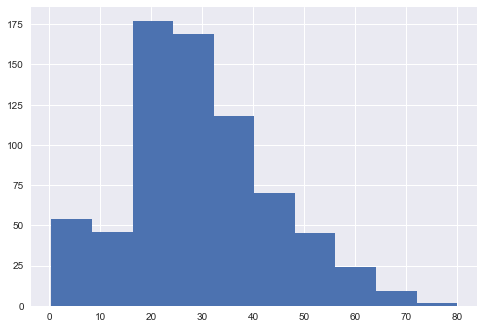

In [174]:
removed_invalid_data['Age'].hist()

## Result 1

This is surprising, I didn't expect the average passenger age to be as low as it is shown to be here.

I wasn't aware that the average age of passengers was so low on the titanic (~29 years). I wonder how this distribution went amongst the various passenger classes.

Perhaps there was some disparity between the various classes of passengers on the Titanic. Let's look at some statistics by passenger class.

# Passengers by Class

In [175]:
removed_invalid_data.groupby('Pclass')['PassengerId'].count()

Pclass
1    186
2    173
3    355
Name: PassengerId, dtype: int64

In [176]:
removed_invalid_data.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

I wonder if the different classes had an effect on survival rate of the passengers. I would asssume that older passengers did not fare as well as younger people if they ended up in the ocean.

In [177]:
survivors = removed_invalid_data[removed_invalid_data.Survived == 1]
non_survivors = removed_invalid_data[removed_invalid_data.Survived == 0]

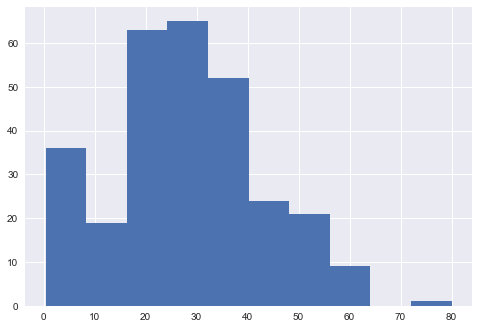

In [178]:
survivors['Age'].hist()

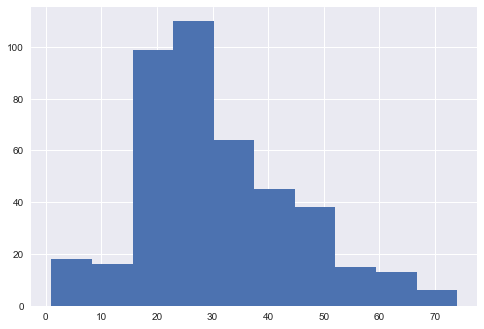

In [179]:
non_survivors['Age'].hist()

The graphs look fairly similar, although it can be seen in the first histogram that there are more survivors in the younger end of the scale, and non-survivors tended to be slightly older. Tentatively this provides some insight into the reason people may have died - in that older passengers struggled to evacuate.

It is interesting that younger passengers were more likely to survive - perhaps this is because their families more readily loaded them into the boats?

## Survivor vs. Non Survivor statistics

In [180]:
survivors.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000
mean,457.768966,1.0,1.872414,28.343690,0.493103,0.527586,51.843205
std,250.845515,0.0,0.836617,14.950952,0.731132,0.807147,70.458776
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,260.500000,1.0,1.000000,19.000000,0.000000,0.000000,13.000000
50%,452.000000,1.0,2.000000,28.000000,0.000000,0.000000,26.250000
75%,669.500000,1.0,3.000000,36.000000,1.000000,1.000000,66.200000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [181]:
non_survivors.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,424.000000,424.0,424.000000,424.000000,424.000000,424.000000,424.000000
mean,442.299528,0.0,2.485849,30.626179,0.525943,0.365566,22.965456
std,264.739548,0.0,0.743633,14.172110,1.044760,0.878341,31.448825
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,200.750000,0.0,2.000000,21.000000,0.000000,0.000000,7.895800
50%,436.000000,0.0,3.000000,28.000000,0.000000,0.000000,11.887500
75%,683.250000,0.0,3.000000,39.000000,1.000000,0.000000,26.550000
max,891.000000,0.0,3.000000,74.000000,5.000000,6.000000,263.000000


It looks like not all young people were spared however, based on the data above at least 1 individual who was just 1 years old did not survive. Very tradgic.

Let's have a look to see if the class of travel had an influence on survival rate?

# Plots of Survival rate by Class

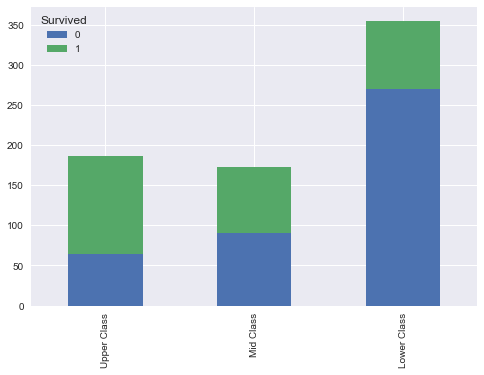

In [182]:
upper_class = removed_invalid_data[removed_invalid_data.Pclass == 1]
middle_class = removed_invalid_data[removed_invalid_data.Pclass == 2]
lower_class = removed_invalid_data[removed_invalid_data.Pclass == 3]

sub_df1 = upper_class.groupby(['Survived'])['PassengerId'].count()
sub_df2 = middle_class.groupby(['Survived'])['PassengerId'].count()
sub_df3 = lower_class.groupby(['Survived'])['PassengerId'].count()
sub_df = pd.concat([sub_df1, sub_df2, sub_df3],keys=["Upper Class", "Mid Class", "Lower Class"]).unstack()

sub_df.plot.bar(stacked=True)

It looks like by far, the lower class passengers fared much worse than middle or upper class. There appears to be a decaying % of passengers as classes increase that perished in the Titanic crash.

The last lense that I'd like to explore the data through is based on survivorship via Gender.

# Plots of Survival Rate by Gender

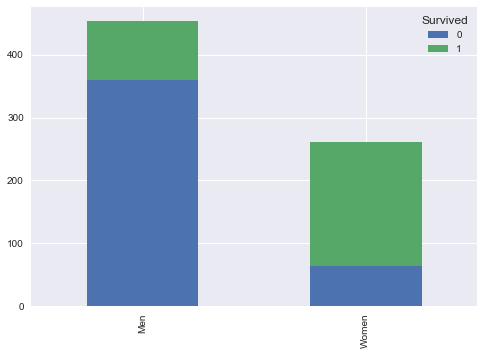

In [183]:
male_passengers = removed_invalid_data[removed_invalid_data.Sex == 'male']
female_passengers = removed_invalid_data[removed_invalid_data.Sex == 'female']

sub_df1 = male_passengers.groupby(['Survived'])['PassengerId'].count()
sub_df2 = female_passengers.groupby(['Survived'])['PassengerId'].count()

sub_df = pd.concat([sub_df1, sub_df2],keys=["Men", "Women"]).unstack()
sub_df.plot.bar(stacked=True)

# Limitations

The conclusions that were able to be deduced from this data set were limited by a few things:
* The data was not complete - as in it was not the total population of all passengers on the Titanic. This could result in biased data
* We were working off incomplete data - we did not know where a passenger was at the time the incident occured, or exactly how they were related to other passengers
* There may have been other external factors that influenced an individuals survival rate that was not covered in the data set as provided

All of the above could mean that any visible correlation we showed was not a direct causation for survival of an individual.

# Conclusions

Based on the analysis above, I have observed the following patterns in the data:
    
* Passengers in higher classes were more likely to survive the incident
* Younger passengers were more likely to survive
* A disproportionate number of men perished compared to women
    
As a result a the tenative conclusion can be drawn that the message presented in the movies (of there being limited life boats, meaning first to the boats were most likely to be saved), and prioritisation of women + children first tentatively holds true (based on the data available).